In [ ]:
# [문제] 와인 데이터 사용
# 와인의 화학 조성을 사용하여 와인의 종류 예측

# ** 특성 이름을 담고 있는 key값 = feature_names
# ** 특성 데이터를 담고 있는 key값 = data
# ** 범주 와인의 종류를 담고 있는 key값 = target_names
#    - 범주는 'class_0'과 'class_1'만 사용 (0과 1로 변경하여 사용)
#    - 0: 레드와인, 1: 화이트와인

# 알콜(Alcohol)
# 말산(Malic acid)
# 회분(Ash)
# 회분의 알칼리도(Alcalinity of ash)
# 마그네슘(Magnesium)
# 총 폴리페놀(Total phenols)
# 플라보노이드 폴리페놀(Flavanoids)
# 비 폴라보노이드 폴리페놀(nonflavanoid_phenols)
# 프로안토시아닌(proanthocyanins)
# 색상의 강도(color_intensity)
# 색상(hue)
# 희석 와인의 od280/od315 비율(od280/od315_of_diluted_wines)
# 프롤린(proline)

In [173]:
from sklearn.datasets import load_wine

wine_all = load_wine()
wine_all

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

## 데이터 전처리(모든 변수)

In [174]:
wine_data = wine_all['data']
wine_target = wine_all['target']

In [175]:
# 타겟이 0과 1인 데이터만 가져오기
wine_data = wine_data[(wine_target==0)|(wine_target==1)]
wine_target = wine_target[(wine_target==0)|(wine_target==1)]

In [176]:
import numpy as np

wine_all['target_names'] = np.array([0,1,2])
wine_all['target_names']

array([0, 1, 2])

In [209]:
# 데이터 분리
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    wine_data, wine_target, random_state=123)

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(97, 13)
(33, 13)
(97,)
(33,)


In [210]:
# 정규화(표준화)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_data)
train_scaled = ss.transform(train_data)
test_scaled = ss.transform(test_data)

## 2. 결정트리

In [211]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

1.0
0.9696969696969697


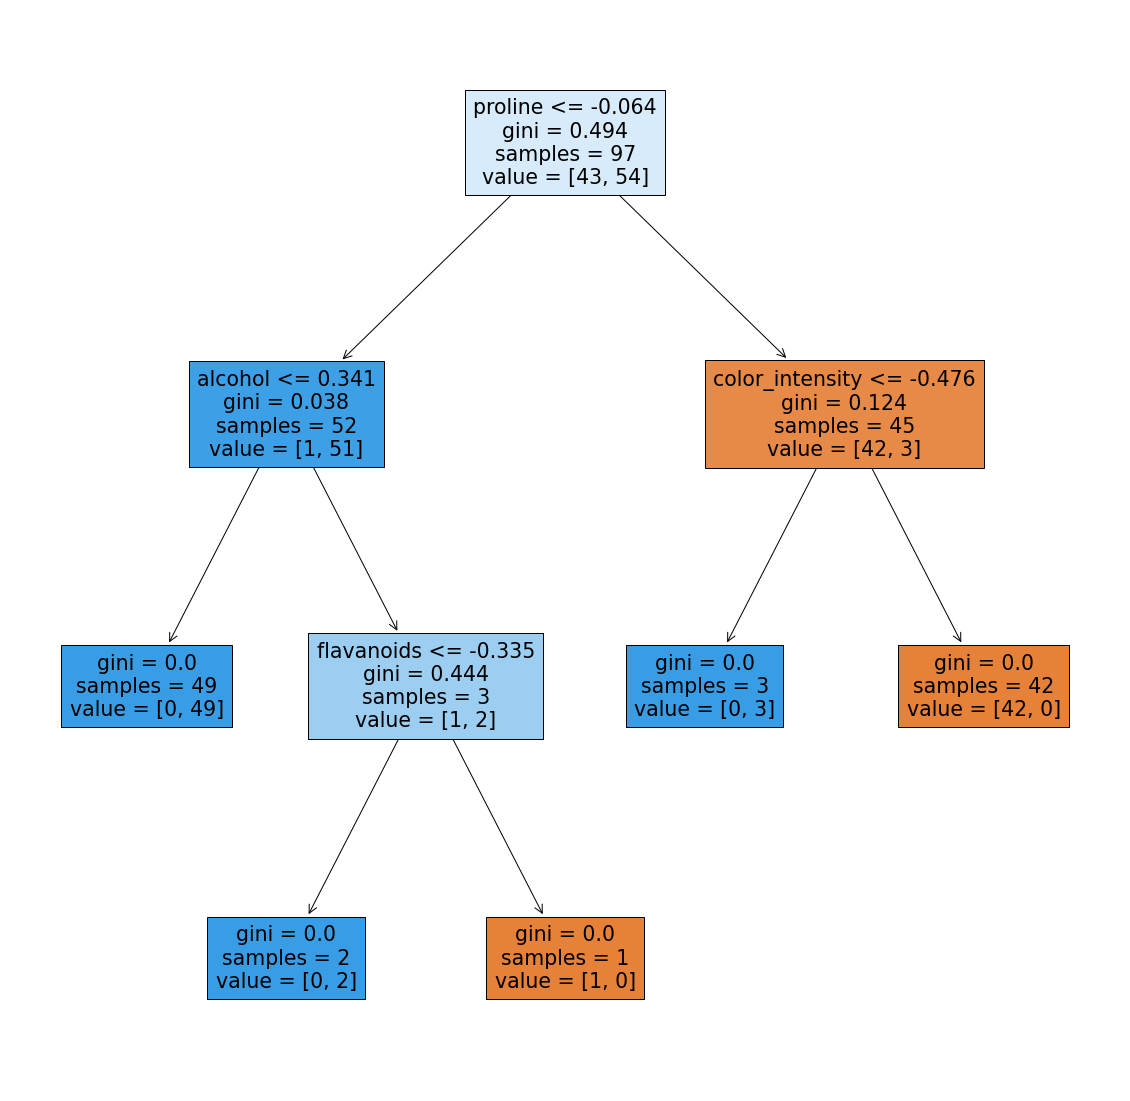

In [212]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(dt, max_depth=3,
              filled=True,
              feature_names=wine_all['feature_names'])
plt.show()

In [213]:
result_pred = dt.predict(test_scaled)

In [214]:
# 정답을 맞춘 갯수와 틀린 갯수 출력
o = len(result_pred[result_pred == test_target])
x = len(result_pred[result_pred != test_target])

print('총 갯수 [{}] 중 정답갯수 [{}]건, 틀린갯수 [{}]건'.format(o+x, o, x))


# 정답률과 오답률 출력
oo = round(o/(o+x) * 100 , 2)
xx = round(x/(o+x) * 100 , 2)

print('총 100.0% 중 정답률 [{}]%, 오답률 [{}]%'.format(oo, xx))

총 갯수 [33] 중 정답갯수 [32]건, 틀린갯수 [1]건
총 100.0% 중 정답률 [96.97]%, 오답률 [3.03]%


In [215]:
## 특성중요도
print(dt.feature_importances_)

[0.01312142 0.         0.         0.         0.         0.
 0.02784955 0.         0.         0.11696813 0.         0.
 0.84206089]


In [208]:
sorted(wine_all['feature_names'])

['alcalinity_of_ash',
 'alcohol',
 'ash',
 'color_intensity',
 'flavanoids',
 'hue',
 'magnesium',
 'malic_acid',
 'nonflavanoid_phenols',
 'od280/od315_of_diluted_wines',
 'proanthocyanins',
 'proline',
 'total_phenols']

In [ ]:
'''
트리 훈련에 사용된 퓨처들의 정확도를 확인해보면
alcalinity_of_ash 0.01, magnesium 0.3, od280/od315_of_diluted_wines 0.15, total_phenols가 0.84 
훈련에 가장 영향을 많이 미친 변수는 total_phenols가(총 폴리페놀)로 나타남
'''

## 3. 로지스틱회귀 분류

In [216]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(train_scaled, train_target)

print(lg.score(train_scaled, train_target))
print(lg.score(test_scaled, test_target))

1.0
1.0


In [217]:
result_pred = lg.predict(test_scaled)

In [218]:
# 정답을 맞춘 갯수와 틀린 갯수 출력
o = len(result_pred[result_pred == test_target])
x = len(result_pred[result_pred != test_target])

print('총 갯수 [{}] 중 정답갯수 [{}]건, 틀린갯수 [{}]건'.format(o+x, o, x))


# 정답률과 오답률 출력
oo = round(o/(o+x) * 100 , 2)
xx = round(x/(o+x) * 100 , 2)

print('총 100.0% 중 정답률 [{}]%, 오답률 [{}]%'.format(oo, xx))

총 갯수 [33] 중 정답갯수 [33]건, 틀린갯수 [0]건
총 100.0% 중 정답률 [100.0]%, 오답률 [0.0]%


In [219]:
print(lg.coef_, lg.intercept_)

[[-1.45914609 -0.47696627 -0.8816843   1.12498962 -0.24817582 -0.06321168
  -0.24069453  0.17801361  0.00189455 -0.77704672  0.11746347 -0.48641707
  -1.64429325]] [0.41605925]


In [38]:
sorted(wine_all['feature_names'])

['alcalinity_of_ash',
 'alcohol',
 'ash',
 'color_intensity',
 'flavanoids',
 'hue',
 'magnesium',
 'malic_acid',
 'nonflavanoid_phenols',
 'od280/od315_of_diluted_wines',
 'proanthocyanins',
 'proline',
 'total_phenols']

In [ ]:
'''
(+) color_intensity, malic_acid, nonflavanoid_phenols, proanthocyanins

(-) alcalinity_of_ash, alcohol, ash, flavanoids, hue, magnesium, od280/od315_of_diluted_wines, proline, total_phenols
'''

## 4. 확률적 경사 하강법

In [220]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log', max_iter=60)

sgd.fit(train_scaled, train_target)

print(sgd.score(train_scaled, train_target))
print(sgd.score(test_scaled, test_target))

1.0
0.9696969696969697


훈련 정확도 리스트 개수 =  300
테스트 정확도 리스트 개수 =  300


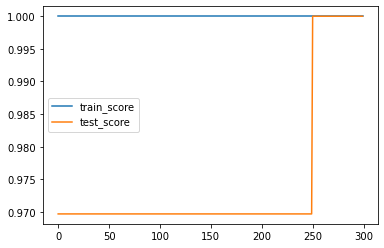

In [221]:
## 에포크 반복 횟수 찾기
train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여, 정확도를 리스트에 저장
for i in range(0,300) :
    sgd.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sgd.score(train_scaled, train_target))
    test_score.append(sgd.score(test_scaled, test_target))
    
# 정확도 리스트 개수 확인
print('훈련 정확도 리스트 개수 = ', len(train_score))
print('테스트 정확도 리스트 개수 = ', len(test_score))


# 최적의 에포크 위치 확인 : 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.legend()
plt.show()

In [ ]:
'''
에포크 반복 횟수는 300으로 조정
'''

In [241]:
sgd = SGDClassifier(loss='log', max_iter=300)

sgd.fit(train_scaled, train_target)

print(sgd.score(train_scaled, train_target))
print(sgd.score(test_scaled, test_target))

1.0
1.0


In [242]:
# test 데이터로 예측
result_pred = sgd.predict(test_scaled)

In [243]:
# 정답을 맞춘 갯수와 틀린 갯수 출력
o = len(result_pred[result_pred == test_target])
x = len(result_pred[result_pred != test_target])

print('총 갯수 [{}] 중 정답갯수 [{}]건, 틀린갯수 [{}]건'.format(o+x, o, x))


# 정답률과 오답률 출력
oo = round(o/(o+x) * 100 , 2)
xx = round(x/(o+x) * 100 , 2)

print('총 100.0% 중 정답률 [{}]%, 오답률 [{}]%'.format(oo, xx))

총 갯수 [33] 중 정답갯수 [33]건, 틀린갯수 [0]건
총 100.0% 중 정답률 [100.0]%, 오답률 [0.0]%


In [ ]:
'''
모든 독립변수에 대해 결정트리, 로지스틱회귀분류, 확률적 경사 하강법 모델을 이용하여 
train 데이터셋으로 훈련, test 데이터셋으로 예측해본 결과,
결정트리, 확률 경사 하강법은 1.0, 로지스틱회귀분류는 0.97의 정확도를 보여주고 있음. 

샘플링 편향을 최소화 하기 위해 데이터 분리 시 stratify = wine_target 속성을 추가 분석해도 동일하게 나타남
'''

---

### * 샘플링 편향 최소화 후 재분석

In [244]:
# 데이터 분리
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    wine_data, wine_target, stratify = wine_target, random_state=123)

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(97, 13)
(33, 13)
(97,)
(33,)


In [245]:
# 정규화(표준화)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_data)
train_scaled = ss.transform(train_data)
test_scaled = ss.transform(test_data)

In [246]:
# 결정트리
dt2 = DecisionTreeClassifier()
dt2.fit(train_scaled, train_target)

print(dt2.score(train_scaled, train_target))
print(dt2.score(test_scaled, test_target))

1.0
1.0


In [247]:
# 로지스틱회귀분류
lg2 = LogisticRegression()
lg2.fit(train_scaled, train_target)

print(lg2.score(train_scaled, train_target))
print(lg2.score(test_scaled, test_target))

1.0
0.9696969696969697


In [248]:
# 확률경사하강법
sgd2 = SGDClassifier(loss='log')
sgd2.fit(train_scaled, train_target)

print(sgd2.score(train_scaled, train_target))
print(sgd2.score(test_scaled, test_target))

1.0
0.9696969696969697


훈련 정확도 리스트 개수 =  300
테스트 정확도 리스트 개수 =  300


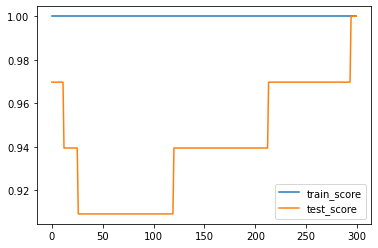

In [249]:
## 에포크 반복 횟수 찾기
train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여, 정확도를 리스트에 저장
for i in range(0,300) :
    sgd2.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sgd2.score(train_scaled, train_target))
    test_score.append(sgd2.score(test_scaled, test_target))
    
# 정확도 리스트 개수 확인
print('훈련 정확도 리스트 개수 = ', len(train_score))
print('테스트 정확도 리스트 개수 = ', len(test_score))


# 최적의 에포크 위치 확인 : 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.legend()
plt.show()

In [ ]:
'''
반복횟수 300으로 지정
'''

In [256]:
sgd2 = SGDClassifier(loss='log', max_iter=300)
sgd2.fit(train_scaled, train_target)

print(sgd2.score(train_scaled, train_target))
print(sgd2.score(test_scaled, test_target))

1.0
1.0


---

In [ ]:
'''
정확도가 매우 높게 나타난 결정트리, 확률적 경사 하강법 모델에 대해 독립변수를 조정하여 재분석
'''

## 5. 독립변수 조정 재분석

In [268]:
import pandas as pd

columns_names = wine_all['feature_names']
df = pd.DataFrame(wine_data, columns=columns_names)
df['target'] = wine_target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


##### 데이터 시각화

In [333]:
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

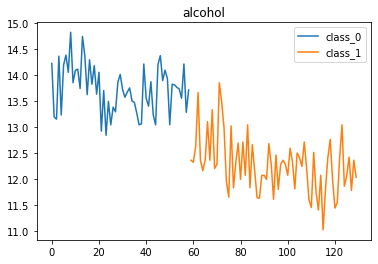

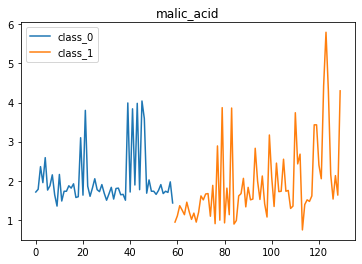

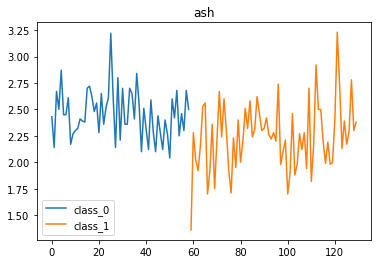

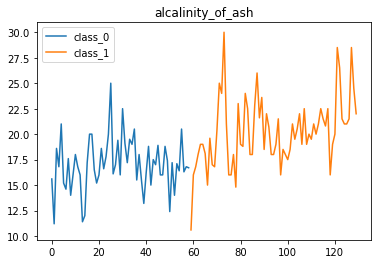

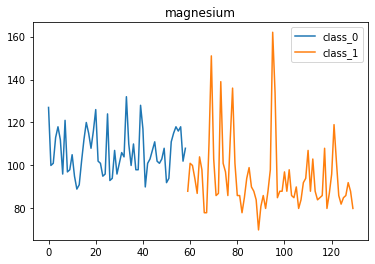

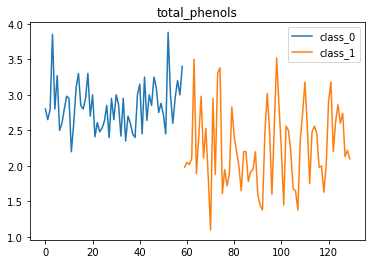

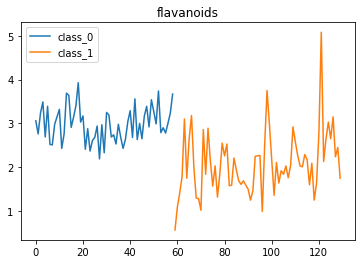

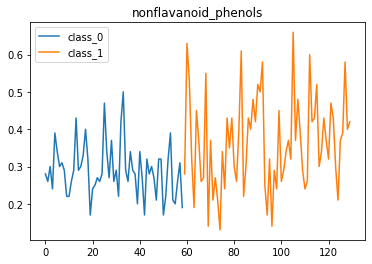

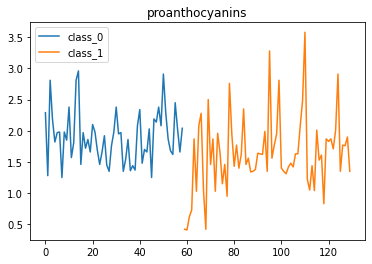

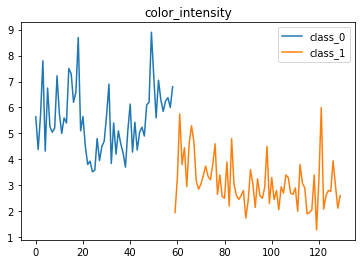

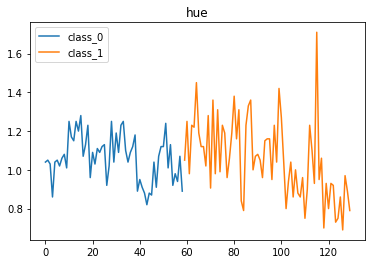

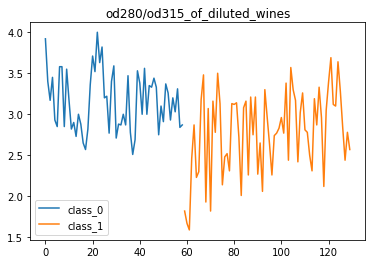

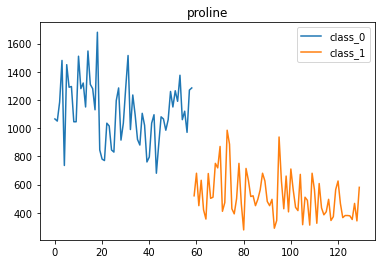

In [334]:
for colnm in wine_all['feature_names'] :
    plt.title(colnm)
    plt.plot(df_0[colnm], label = 'class_0')
    plt.plot(df_1[colnm], label = 'class_1')
    plt.legend()
    plt.show()

##### 상관관계

In [269]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.021014,0.190818,-0.461771,0.330544,0.485061,0.543729,-0.301314,0.190869,0.741935,0.026162,0.290491,0.756168,-0.824399
malic_acid,0.021014,1.000000,0.121625,0.141753,-0.016360,0.030038,0.057852,0.055669,0.136454,-0.108202,-0.408645,0.166457,-0.107553,-0.044302
ash,0.190818,0.121625,1.000000,0.369136,0.306593,0.254490,0.377025,0.179396,0.077778,0.253347,0.041164,0.214496,0.304101,-0.354548
alcalinity_of_ash,-0.461771,0.141753,0.369136,1.000000,-0.123546,-0.228873,-0.180189,0.335042,-0.096965,-0.433335,-0.035805,-0.000632,-0.427021,0.470437
magnesium,0.330544,-0.016360,0.306593,-0.123546,1.000000,0.304089,0.255309,-0.212922,0.278018,0.345495,0.071684,0.130838,0.426982,-0.383085
total_phenols,0.485061,0.030038,0.254490,-0.228873,0.304089,1.000000,0.846509,-0.444721,0.444117,0.590428,-0.008302,0.494673,0.506179,-0.532692
flavanoids,0.543729,0.057852,0.377025,-0.180189,0.255309,0.846509,1.000000,-0.358804,0.542889,0.707064,-0.006622,0.537528,0.545781,-0.610730
nonflavanoid_phenols,-0.301314,0.055669,0.179396,0.335042,-0.212922,-0.444721,-0.358804,1.000000,-0.337243,-0.280354,0.051340,-0.468611,-0.330049,0.337489
proanthocyanins,0.190869,0.136454,0.077778,-0.096965,0.278018,0.444117,0.542889,-0.337243,1.000000,0.272754,-0.010739,0.342529,0.274927,-0.249205
color_intensity,0.741935,-0.108202,0.253347,-0.433335,0.345495,0.590428,0.707064,-0.280354,0.272754,1.000000,0.009784,0.208163,0.775315,-0.750613


In [ ]:
'''
데이터프레임화하여 상관계수가 0.3 이상인 변수를 확인해보면
특히 color_intensity, alcohol, proline 변수와 target이 관계가 있는 것을 알 수 있다.

total_phenols, flavanoids도 비교적 높게 나타난 편이다.

<음의 상관관계>
alcohol(-0.82), ash(-0.35), magnesium(-0.38), total_phenols(-0.53), flavanoids(-0.61), color_intensity(-0.75),
od280/od315_of_diluted_wines(-0.39), proline(-0.85)

<양의 상관관계>
alcalinity_of_ash(0.47), nonflavanoid_phenols(0.33)
'''

In [271]:
df_data1 = df[['color_intensity', 'alcohol', 'proline']]
df_data2 = df[['color_intensity', 'alcohol', 'proline', 'total_phenols', 'flavanoids']]
df_data3 = df[['alcohol', 'ash', 'magnesium', 'total_phenols', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline']]

df_data4 = df[['alcalinity_of_ash', 'nonflavanoid_phenols']]

df_data5 = df[['alcohol', 'total_phenols', 'flavanoids', 'color_intensity', 'alcalinity_of_ash']]

df_target = df['target']

In [336]:
# 데이터 분리
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    df_data1, df_target, stratify = df_target, random_state=123)

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(97, 3)
(33, 3)
(97,)
(33,)


In [337]:
# 정규화(표준화)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_data)
train_scaled = ss.transform(train_data)
test_scaled = ss.transform(test_data)

In [323]:
# 결정트리
dt3 = DecisionTreeClassifier()
dt3.fit(train_scaled, train_target)

print(dt3.score(train_scaled, train_target))
print(dt3.score(test_scaled, test_target))

1.0
1.0


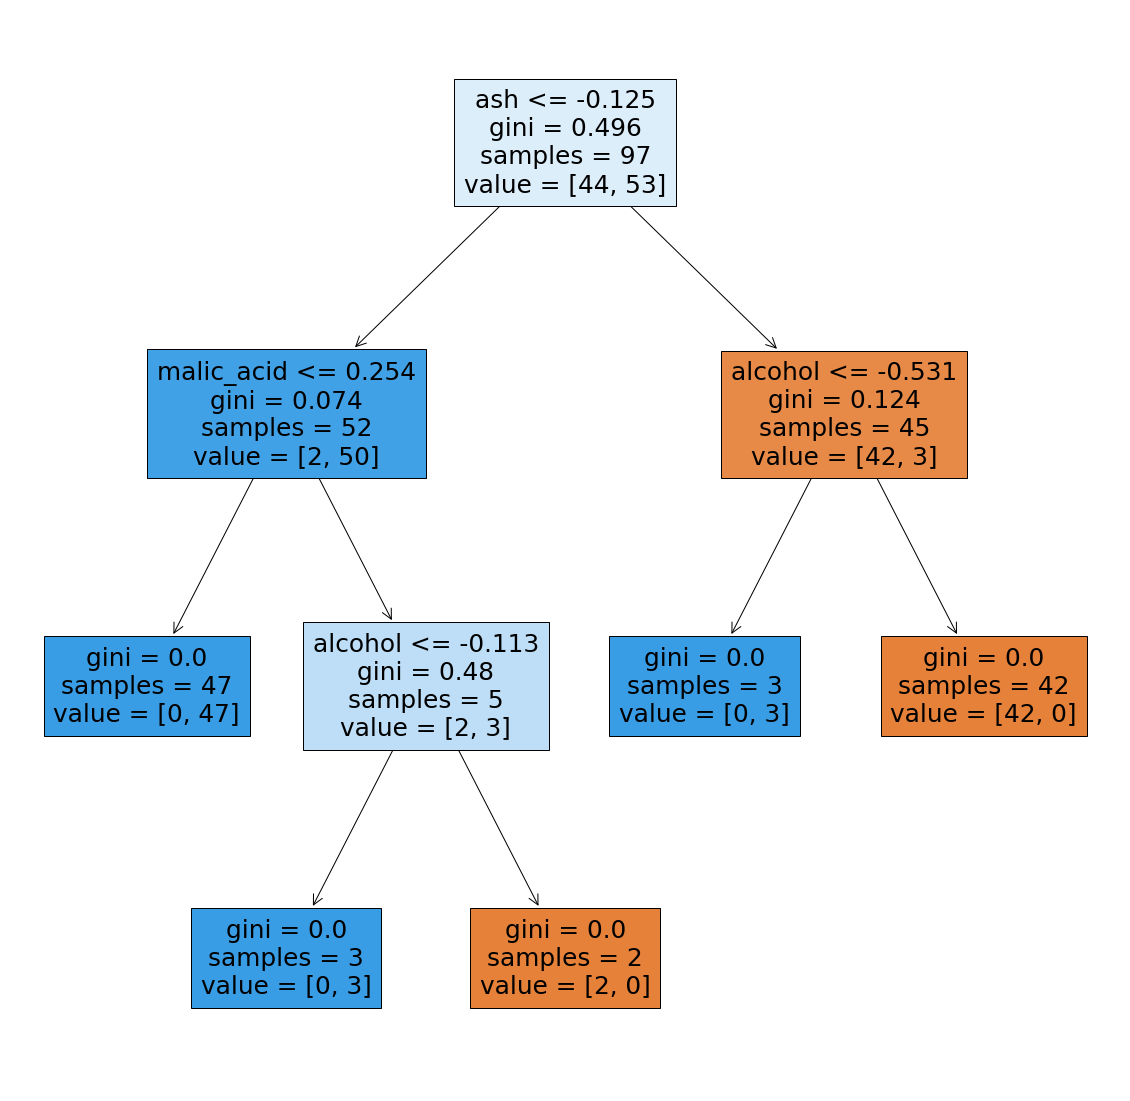

In [335]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(dt3, max_depth=3,
              filled=True,
              feature_names=wine_all['feature_names'])
plt.show()

In [ ]:
'''
df_data1의 경우 train_score = 1.0, test score = 1.0
df_data2, df_data3의 경우 train_score = 1.0, test score = 0.93
df_data4의 경우 train_score = 0.99, test score = 0.61
df_data5의 경우 train_score = 1.0, test score = 0.91

음의 상관관계를 보인 독립변수들만 있는 데이터의 경우 정확도가 전반적으로 높은 반면,
양의 상관관계를 보인 alcalinity_of_ash(0.47), nonflavanoid_phenols(0.33) 독립변수가 포함되면 
정확도가 떨어지는 것이 보임 (df_data4, df_data5)

결정트리 모델에서는 상관계수가 높은 변수만 있는 df_data1의 
독립변수 'color_intensity', 'alcohol', 'proline'가 적합함
'''

In [324]:
# df_data1/test 데이터로 예측
result_pred = dt3.predict(test_scaled)

# 정답을 맞춘 갯수와 틀린 갯수 출력
o = len(result_pred[result_pred == test_target])
x = len(result_pred[result_pred != test_target])

print('총 갯수 [{}] 중 정답갯수 [{}]건, 틀린갯수 [{}]건'.format(o+x, o, x))


# 정답률과 오답률 출력
oo = round(o/(o+x) * 100 , 2)
xx = round(x/(o+x) * 100 , 2)

print('총 100.0% 중 정답률 [{}]%, 오답률 [{}]%'.format(oo, xx))

총 갯수 [33] 중 정답갯수 [33]건, 틀린갯수 [0]건
총 100.0% 중 정답률 [100.0]%, 오답률 [0.0]%


In [330]:
# 확률경사하강법
sgd3 = SGDClassifier(loss='log', max_iter=300)
sgd3.fit(train_scaled, train_target)

print(sgd3.score(train_scaled, train_target))
print(sgd3.score(test_scaled, test_target))

1.0
0.9696969696969697


In [331]:
'''
df_data1, df_data2의 경우 train_score = 1.0, test score = 0.97
df_data3의 경우 train_score = 1.0, test score = 0.91
df_data4의 경우 train_score = 0.66, test score = 0.66
df_data5의 경우 train_score = 0.87, test score = 0.91

결정트리와 마찬가지로
음의 상관관계를 보인 독립변수들만 있는 데이터의 경우 정확도가 전반적으로 높은 반면,
양의 상관관계를 보인 alcalinity_of_ash(0.47), nonflavanoid_phenols(0.33) 독립변수가 포함되면 
정확도가 떨어지는 것이 보임 (df_data4, df_data5)

확률적 경사 하강법 모델에서는 상관계수가 높은 변수만 있는 df_data1과 df_data2의 
독립변수 'color_intensity', 'alcohol', 'proline' / 'total_phenols', 'flavanoids'가 적합함
'''

"\ndf_data1, df_data2의 경우 train_score = 1.0, test score = 0.97\ndf_data3의 경우 train_score = 1.0, test score = 0.91\ndf_data4의 경우 train_score = 0.66, test score = 0.66\ndf_data5의 경우 train_score = 0.87, test score = 0.91\n\n결정트리와 마찬가지로\n음의 상관관계를 보인 독립변수들만 있는 데이터의 경우 정확도가 전반적으로 높은 반면,\n양의 상관관계를 보인 alcalinity_of_ash(0.47), nonflavanoid_phenols(0.33) 독립변수가 포함되면 \n정확도가 떨어지는 것이 보임 (df_data4, df_data5)\n\n확률적 경사 하강법 모델에서는 상관계수가 높은 변수만 있는 df_data1과 df_data2의 \n'color_intensity', 'alcohol', 'proline' / 'total_phenols', 'flavanoids' 독립변수가 적합함\n"

훈련 정확도 리스트 개수 =  500
테스트 정확도 리스트 개수 =  500


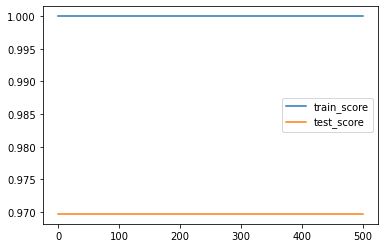

In [340]:
## 에포크 반복 횟수 찾기
train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여, 정확도를 리스트에 저장
for i in range(0,500) :
    sgd3.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sgd3.score(train_scaled, train_target))
    test_score.append(sgd3.score(test_scaled, test_target))
    
# 정확도 리스트 개수 확인
print('훈련 정확도 리스트 개수 = ', len(train_score))
print('테스트 정확도 리스트 개수 = ', len(test_score))


# 최적의 에포크 위치 확인 : 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.legend()
plt.show()

In [332]:
# df_data1/test 데이터로 예측
result_pred = sgd3.predict(test_scaled)

# 정답을 맞춘 갯수와 틀린 갯수 출력
o = len(result_pred[result_pred == test_target])
x = len(result_pred[result_pred != test_target])

print('총 갯수 [{}] 중 정답갯수 [{}]건, 틀린갯수 [{}]건'.format(o+x, o, x))


# 정답률과 오답률 출력
oo = round(o/(o+x) * 100 , 2)
xx = round(x/(o+x) * 100 , 2)

print('총 100.0% 중 정답률 [{}]%, 오답률 [{}]%'.format(oo, xx))

총 갯수 [33] 중 정답갯수 [32]건, 틀린갯수 [1]건
총 100.0% 중 정답률 [96.97]%, 오답률 [3.03]%


---

In [ ]:
'''
상관계수가 높을수록 모델에 적합한 독립변수임을 확인할 수 있었다.
독립변수 'color_intensity', 'alcohol', 'proline'에 대해 결정트리가 가장 적합한 모델로 나타났다.
'''